<a href="https://colab.research.google.com/github/whataLIN/DeepLearning/blob/main/whataLIN/ch09_DL_06_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5_qus0in_%EC%9E%8E%EC%82%AC%EA%B7%80_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()
# kaggle > Profile 이미지 > Account > Account > API > Create New API Token
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# late submission
# https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7
!kaggle competitions download -c plant-pathology-2020-fgvc7 # kaggle.json? -> 403, late submission -> 401

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 97% 758M/779M [00:06<00:00, 139MB/s]
100% 779M/779M [00:06<00:00, 135MB/s]


In [ ]:
!ls
!unzip plant-pathology-2020-fgvc7

plant-pathology-2020-fgvc7.zip	sample_data
Archive:  plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  in

In [ ]:
!ls

images				sample_data	       test.csv
plant-pathology-2020-fgvc7.zip	sample_submission.csv  train.csv


In [ ]:
import pandas as pd

# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')
# submission = pd.read_csv('sample_submission.csv')

# 데이터 경로 (Kaggle 대응)
data_path = './'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [ ]:
train.shape, test.shape

((1821, 5), (1821, 1))

In [ ]:
train.head()
# image_id : 확장자가 없음 -> dataset 만들 때 추가
# healthy	multiple_diseases	rust	scab -> 0, 1 -> 원핫인코딩

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [ ]:
submission.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


# 데이터 시각화

## 타깃값 분포

In [ ]:
# 데이터를 타깃값별로 추출
healthy = train.loc[train['healthy'] == 1]
# healthy
multiple_diseases = train.loc[train['multiple_diseases'] == 1]
# multiple_diseases
rust = train.loc[train['rust'] == 1]
# rust
scab = train.loc[train['scab'] == 1]
# scab

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
7,Train_7,0,0,0,1
8,Train_8,0,0,0,1
11,Train_11,0,0,0,1
12,Train_12,0,0,0,1
...,...,...,...,...,...
1806,Train_1806,0,0,0,1
1809,Train_1809,0,0,0,1
1812,Train_1812,0,0,0,1
1816,Train_1816,0,0,0,1


> 이 코드를 깔끔하게 리팩토링해주고 설명을 덧붙여줘
* https://sharegpt.com/c/t00CyWE

In [ ]:
train.columns.tolist()[1:]

['healthy', 'multiple_diseases', 'rust', 'scab']

In [ ]:
# [col for col in train.columns[1:]]
healthy, multiple_diseases, rust, scab = [
    train.loc[train[col] == 1] for col in train.columns[1:]
]

In [ ]:
healthy

,image_id,healthy,multiple_diseases,rust,scab
2,Train_2,1,0,0,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0
9,Train_9,1,0,0,0
13,Train_13,1,0,0,0
...,...,...,...,...,...
1808,Train_1808,1,0,0,0
1810,Train_1810,1,0,0,0
1814,Train_1814,1,0,0,0
1817,Train_1817,1,0,0,0


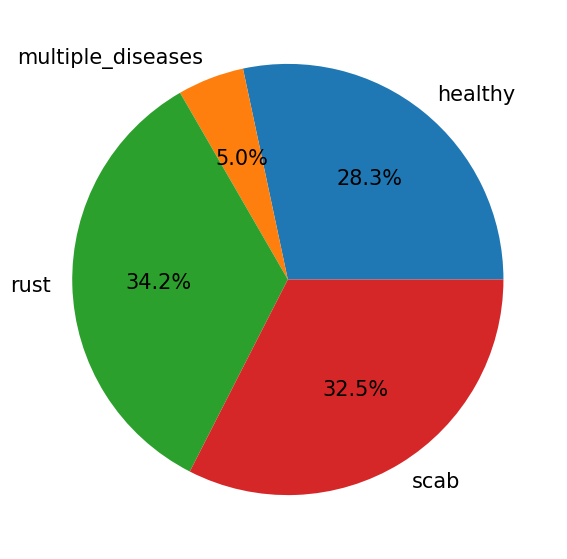

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=15)
plt.figure(figsize=(7, 7))

# label = train.columns.tolist()[1:]
label = ['healthy', 'multiple_diseases', 'rust', 'scab']
# 타깃값 분포 파이 그래프
plt.pie(
    [len(healthy), len(multiple_diseases), len(rust), len(scab)],
    labels = label,
    autopct = '%.1f%%' # 소수점 1째자리까지
)
plt.show()

> 이 코드를 이해하기 쉽도록 주석으로 설명을 자세하게 달아줘
* https://sharegpt.com/c/3vBbID9

## 이미지 출력

> 파이썬에서 이미지를 읽어보는 세 가지 방법 (PIL, Matplotlib, OpenCV)에 대해서 설명해주고 예시코드도 같이 보여줘. 각기 차이점도 설명해줘.
* https://shareg.pt/gMkkBQA

> 에러 처리에 있어서 raise와 assert 간의 차이점을 설명해줘
* https://sharegpt.com/c/sJcENO2


In [ ]:
import matplotlib.gridspec as gridspec # 서브플롯 자동으로 배치
import cv2 # 이미지 불러오기

def show_image(img_ids, rows=2, cols=3):
    assert len(img_ids) <= rows * cols # 이미지가 행/열 개수보다 많으면 오류 발생
    # assert는 True면은 문제가 없고, False일 때 에러를 발생시킴

    plt.figure(figsize=(15, 8)) # 전체 이미지 사이즈 설정
    grid = gridspec.GridSpec(rows, cols) # 서브플롯 배치

    # 이미지 출력
    for idx, img_id in enumerate(img_ids):
        img_path = f'images/{img_id}.jpg' # 이미지 파일 경로
        image = cv2.imread(img_path) # 이미지 파일 읽기
        # 이미지 색상 보정
        image = cv2.cvtColor(image, cv2.COLOR_B)
        ax = plt.subplot(grid[idx]) # gridspec -> 서브플롯
        # 이미지 출력
        ax.imshow(image)
    
    plt.show()

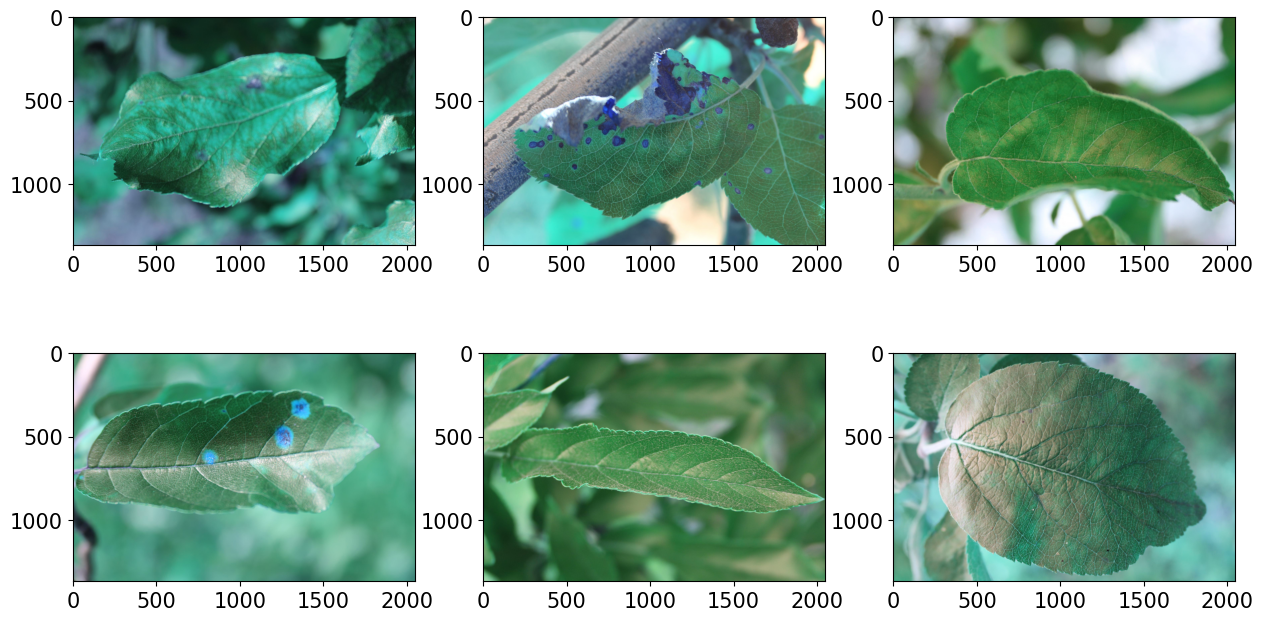

In [ ]:
show_image(train.image_id.iloc[:6]) # convert를 안하면 (BGR -> RGB)

> opencv와 matplotlib을 통해서 이미지를 불러왔을 때의 둘 간의 차이점을 이미지 색상 차원을 중심으로 설명해줘.
* https://sharegpt.com/c/t0GKUUC

In [ ]:
# 각 타깃별 이미지 ID 6개 -> 출력
num_of_lmgs = 6
# 뒤에서 num_of_lmgs만큼의 갯수만큼 이미지 id를 추출

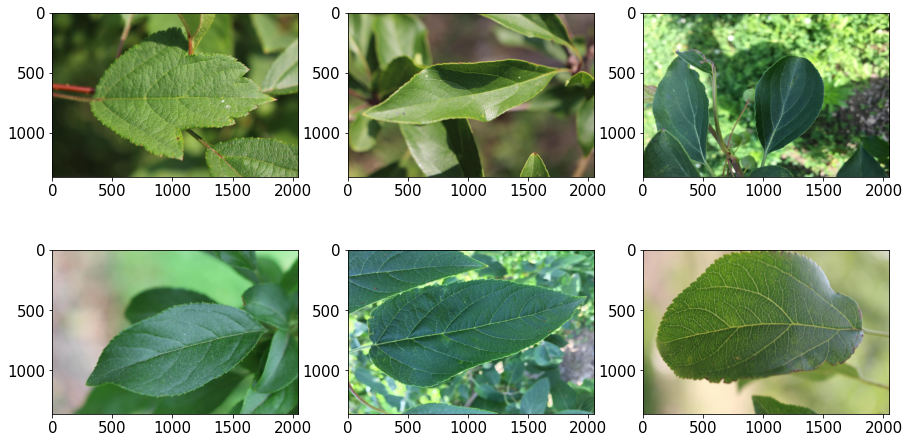

In [ ]:
show_image(last_imgs(healthy)) # 건강한 잎사귀

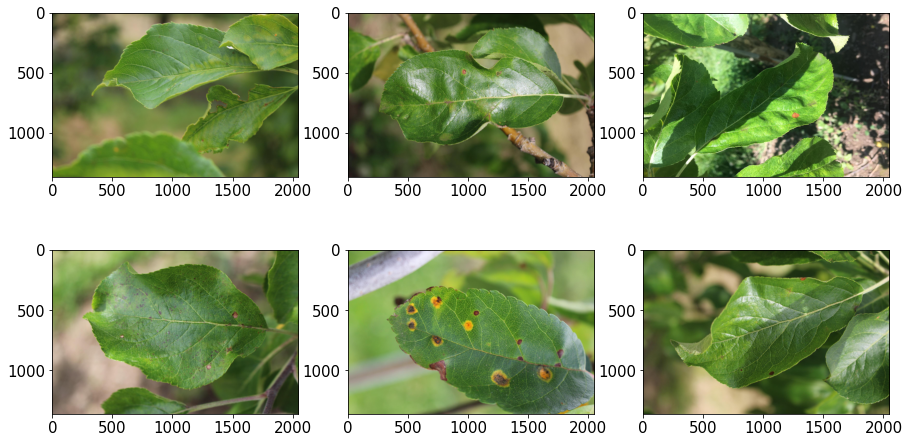

In [ ]:
show_image(last_imgs(multiple_diseases)) # 여러 질병에 걸린 잎사귀

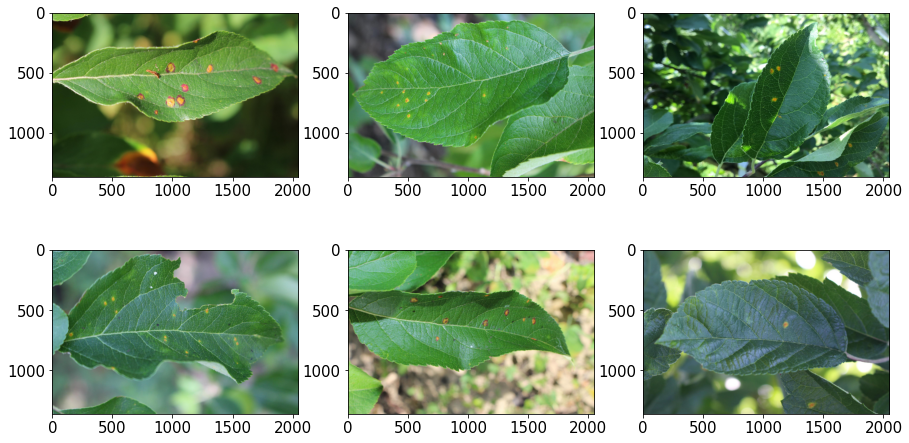

In [ ]:
show_image(last_imgs(rust)) # 녹병에 걸린 잎사귀

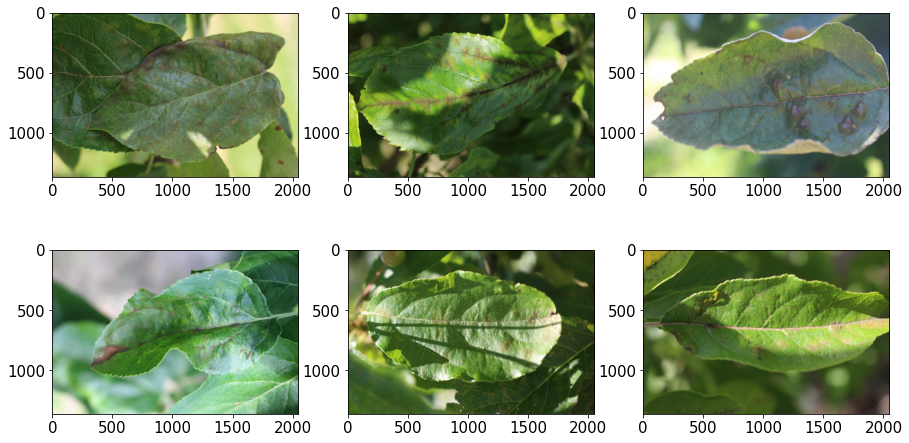

In [ ]:
show_image(last_imgs(scab)) # 붉은곰팡이병에 걸린 잎사귀